
## An Overview of Scipy-Stats Python Library

Scipy-stats is the statistical Functions subpackage of the SciPy library.It consists of a large number of probability distribution and statistical functions.

Purpose  : 

1. Has functions for both Discrete and Continuous variables

2. Descriptive Statistical values - the values of observation in a variable

4. Different types of distributions such as :

        .  Uniform ( continous or discrete )-  distribution describes an experiment where there is an arbitrary outcome that lies between certain parameters or  "discrete uniform distribution" would be "a known, finite number of outcomes equally likely to happen".
       . Continuous - A probability distribution in which the random variable X can take on any value (is continuous)
       . Binomial -distribution type that has two possible outcomes e.g, a coin toss has only two possible outcomes: heads or   tails 

5. Perform T-tests on data to evaluate the difference between the mean (average) values of two arrays.


SciPy Stats consists of the following three generic base classes:


1. rv_continuous

 - construction of a specific distribution sub-classes and instances for continuous random variables. It can take any value

2. rv_discrete

 - construction of a specific distribution sub-classes and instances for discrete random variables.Example distribution of this would be bionmial 

3. rv_histogram
  - used  to generate specific distribution histograms. It can also be inherited from the class.



We are going to use ANOVA for comparing between a categorical and numerical variable - using sci-py package in python  : 
    
ANOVA stands fo Analysis of Variance analysis. It uses F-tests to statistically test the equality of means. Named after Sir Ronald Fisher of the iris dataset fame.  

We are going to examine the dataset looking at 3 different diets and their effects on a group of 78 people. We want to see if there is a direct relationship between each of the diets and the calculated weight loss ( if any) of the 78 people.  

The variables looked at are Gender , Age , Height , Preweight , Diet and weight after 6 weeks , the weight loss calculated was also added to the csv file before importing it. The independent variable is is diet


https://www.sheffield.ac.uk/mash/statistics/datasets

This data set contains information on 78 people using one of three diets:

| Variable Name   	| Variable                        	| Data Type 	|
|-----------------	|---------------------------------	|-----------	|
| People          	| Particular Number               	|           	|
| Gender          	| 1= Male, 0 = Female             	| Binary    	|
| Age             	| Age ( years)                    	| Scale     	|
| Height          	| Height(cm)                      	| Scale     	|
| Preweight       	| Weight before the diet (kg)     	| Scale     	|
| Diet            	| Diet                            	| Binary    	|
| Weight 6 weeks 	| Weight after 6 weeks (kg)      	| Scale     	|



<img src="C:\Users\User\Desktop\repo\Machine-learning-and-Statistics\Scipy Stats\Guidelines for Anova testing.png"
width=400 height=400 />


In [11]:
Question : Which diet is best for losing weight ? /  Are there gender differences for weight lost ?


SyntaxError: invalid syntax (<ipython-input-11-ed558ed30510>, line 1)

In [21]:
# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec
 
import pylab
import matplotlib.pyplot as plt
# For plotting 
import plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px

## IMPORTING THE DATABASE

In [6]:
df = pd.read_csv(r'C:\Users\User\Desktop\repo\Machine-learning-and-Statistics\Scipy Stats\Diet_R.csv')
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,Weight loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8
74,75,1,49,177,84,3,79.9,4.1
75,76,1,28,164,85,3,79.7,5.3
76,77,1,40,167,87,3,77.8,9.2


In [9]:
#observation size
df.shape[0]   # number of observations


78

In [14]:
df.groupby("Diet")['Weight loss'].describe()

,count,mean,std,min,25%,50%,75%,max
Diet,,,,,,,,
1,24.0,3.300000,2.240148,-0.6,1.975,3.05,3.95,9.0
2,27.0,3.025926,2.523367,-2.1,1.700,3.30,4.50,7.9
3,27.0,5.148148,2.395568,0.5,3.450,5.40,7.00,9.2


By grouping the diet and weight loss together and running the descibe() on it , we can see that diet 3 is the better diet to do as the mean weight is greater. The standard deviations are similar which can mean that the weight loss between each group is evenly spread out as well. 

## Defining the Hypotheses

H₀ (Null hypothesis) — that there is no difference among the 3 diet group means.
H₁ (Alternate hypothesis) — that at least one group differs significantly from the overall mean of the dependent variable.

### Assumption 1: Dependent variable
**************************************

In [46]:
# The dependent variable.
dependent = df['Weight loss']
dependent

0     0.0
1     0.0
2     3.8
3     6.0
4     0.7
     ... 
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
Name: Weight loss, Length: 78, dtype: float64

In [13]:
dependent.describe()

count    78.000000
mean      2.038462
std       0.812920
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Diet, dtype: float64

### Assumption 2: Independent variable
*************************************

In [45]:
# Independent variable.
independent = df['Diet']
independent

0     2
1     2
2     1
3     1
4     1
     ..
73    3
74    3
75    3
76    3
77    3
Name: Diet, Length: 78, dtype: int64

### Assumption 4: Outliers
*************************************************

Reference #https://statisticsbyjim.com/basics/graph-groups-boxplots-individual-values/

We draw a box plot to show distributions by breaking down the data in to quartiles. The boxplot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, then symbols are displayed for outliers that fall outside the whiskers.Outliers are the unusual values in a dataset and can have a negative effect on statistical analysis- leading to distortion of results or unsure findings
Boxplots is a good method if you have multiple distributions

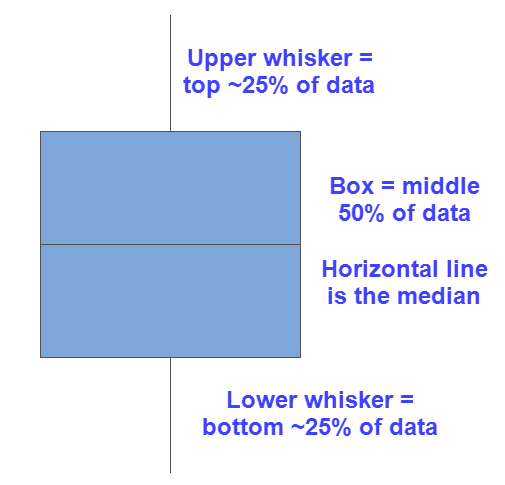! 

What does a boxplot tell us apart from the presence or not of outliers ?

- if a distribution is symmetrical  , the length of the box and whiskers on both sides of the median should be approx equal 
if not the data distribution is skewed

So looking at the box plot of out diet dataset variables  , we see that diet 1 and 2 have the same median but diet 2 has more variability . Diet 3 median value is greater than 1 and 2 and has more variability in weight loss. There is also the appearance of 2 outliers for diet 1. 

<AxesSubplot:xlabel='Diet', ylabel='Weight loss'>

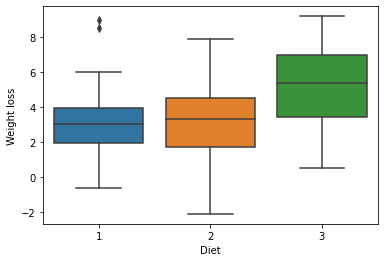

In [47]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=independent, y=dependent)

Using the plotly express package in python , we created a boxplot with go.Box from the plotly.graph objects.Its just another way of illustrating the variables

reference : https://plotly.com/python/box-plots/

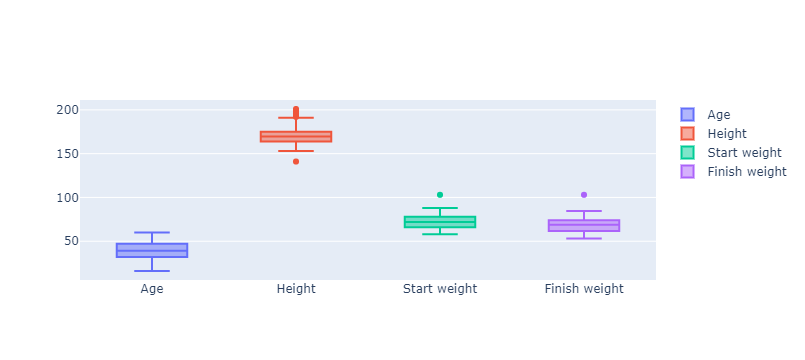

In [48]:
fig = go.Figure()

fig.add_trace(go.Box(y=df.Age.values, name = "Age"))
fig.add_trace(go.Box(y=df.Height.values, name = "Height"))
fig.add_trace(go.Box(y=df["pre.weight"].values, name = "Start weight"))
fig.add_trace(go.Box(y=df["weight6weeks"].values, name = "Finish weight"))

fig.show()

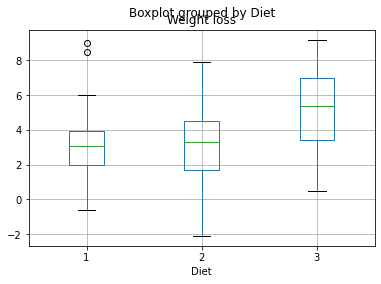

In [10]:
_ = df.boxplot('Weight loss', by='Diet')

### Assumption 5: Normality
*******************************************

Anova assumes that each samples was drawn from a normally distributed population. To check this assumption we look at 2 approaches : 

1. Visually using histograms or Q-Q plots
2. Formal statisticals test : Shapiro-Wilk 

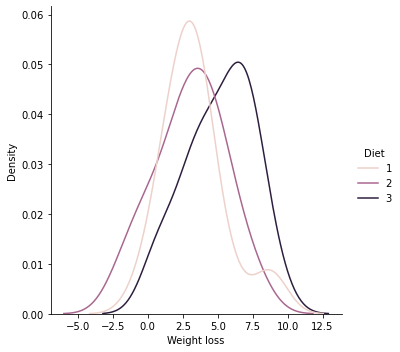

In [49]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

In [22]:
ss.probplot(df, plot=plt)
plt.show()

TypeError: '<' not supported between instances of 'str' and 'int'

In [54]:
# Extract the weight losses for diet 1.
Weightloss_1 = dependent[independent == 1]
Weightloss_1

2     3.8
3     6.0
4     0.7
5     2.9
6     2.8
7     2.0
8     2.0
9     8.5
10    1.9
11    3.1
12    1.5
13    3.0
14    3.6
15    0.9
45   -0.6
46    1.1
47    4.5
48    4.1
49    9.0
50    2.4
51    3.9
52    3.5
53    5.1
54    3.5
Name: Weight loss, dtype: float64

In [53]:
# Run the Shapiro-Wilk test.
ss.shapiro(dependent[independent == 1])

ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)

In [55]:
ss.shapiro(dependent[independent == 2])

ShapiroResult(statistic=0.9855913519859314, pvalue=0.961176335811615)

In [56]:
# Run the test for the virginica.
ss.shapiro(dependent[independent == 3])

ShapiroResult(statistic=0.9601252675056458, pvalue=0.37203603982925415)

### Assumption 6: Homogeneity of Variances
**************************************************

reference :https://www.statisticssolutions.com/the-assumption-of-homogeneity-of-variance/

This is the assumption that all comparison groups have the same variance. If they dont , as long as the group sizes are equal , anova can go ahead a utilize F statistics without the fear of violation of this assumption. If the group sizes are not equal and homogeneity is violated then the F statistic is deemed biased. Large sample variances are associated with small groups sizes , causing the significance level to be underestimated and the null hypothesis to be rejected in error.However if large sample variances are associated with large group sizes , then this leads to overestimated significance level and may in turn lead to reducing the power of the test. 
There are several tests that can be used to test this assumption : Levene;s test . It assesses if the groups have equal variances by using F-test. A p value less than 0.05 indicates a violation of the assumption 

In [57]:
# Test for equal variances.
ss.levene(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

LeveneResult(statistic=0.6256665777896286, pvalue=0.5376731304274011)

In [ ]:
The result is greater than 0.05 , therefore equal variances can be assumed and the anova results are valid

### One-way ANOVA
Even though assumption 6 (and possible 4) are looking bad, we'll go ahead for learning purposes.
*****************************************************************************************************

In [58]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

F_onewayResult(statistic=6.1974474531653545, pvalue=0.0032290142385893524)

the following rules to determine if the categorical variable has any influence on the numerical variable:
if p < 0.05, this means that the categorical variable has significant influence on the numerical variable
if p > 0.05, this means that the categorical variable has no significant influence on the numerical variable

In [ ]:
## Two-Way Anova

Two-way ANOVA —used to check how a numerical variable responds to the levels of two or more independent categorical variables : So for the diet dataset , we can look at the effect of a persons height on weight loss. Ancova standards for 'Analysis of covariance' . It combines anova methods with linear regression on a number of different levels. The resulting output shows the effect of the independent variable after the effects of the covariates have been removed/ or accounted for. 
This is used to determine where or note there is statiscally significant difference between the means of three of more independent grps after contrilling for one or more covariates

In [13]:
df.groupby("Diet")['Height', 'Weight loss'].describe()

<ipython-input-13-95d2940ec238>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Height                                                             \
      count        mean        std    min    25%    50%     75%    max   
Diet                                                                     
1      24.0  170.291667  10.948413  156.0  164.5  167.5  173.25  201.0   
2      27.0  174.851852  12.082103  160.0  165.5  171.0  181.00  199.0   
3      27.0  167.259259   9.709601  141.0  161.5  169.0  174.00  183.0   

     Weight loss                                                   
           count      mean       std  min    25%   50%   75%  max  
Diet                                                               
1           24.0  3.300000  2.240148 -0.6  1.975  3.05  3.95  9.0  
2           27.0  3.025926  2.523367 -2.1  1.700  3.30  4.50  7.9  
3           27.0  5.148148  2.395568  0.5  3.450  5.40  7.00  9.2

From the above comparison of diet types and height and weight loss, diet 3 with the most weight loss is also the the grp where the mean height is lower. Height may influence the weight loss as well 

In [ ]:
Performing the Ancova test : 
    
    Factor variable - Diet type 1,2,3
    Covariate - height
    Response variable - Weight loss

In [9]:
from pingouin import ancova

#perform ANCOVA
ancova(data=df, dv='Weight loss', covar='Height', between='Diet')

,Source,SS,DF,F,p-unc,np2
0,Diet,64.641783,2,5.563321,0.005612,0.130707
1,Height,0.265947,1,0.045777,0.831170,0.000618
2,Residual,429.913312,74,NaN,NaN,NaN
